In [1]:
using Distributions
###########
R = 8.0; #radius of the cicle where uniform hit is generated 
#Particle 
#amorphous track parameters
E = 56.0; #C 149MeV %p 80MeV %p 18.6MeV %C 280.0Mev #He 145.74-56MeV
A = 1;
LET = 4.5; #C 149MeV 19.56 keV/um, p 80MeV 0.86(0.6) keV/um, p 18.6MeV  2.76 keV/um %C 280.0Mev 13.12 keV/um #He 145.74-56MeV 4.5
rho = 1;

par = string("He", "_", string(E));

#Time and number of particle
Dose = 12.0;
kR = 0.8;

function ATRadius(E, A, kR)

    Rc = 0.01; 

    Rp = 0.05*((E/A)^(1.7)); 

    if kR < 1.0
        Rk = Rc*exp((kR*(1+2*log(Rp/Rc))-1)/2);
    else
        Rk = Rp;
    end

    return Rc, Rp, Rk

end

(Rc, Rp, Rk) = ATRadius(E, A, kR);
println("Rc=",Rc,"\nRp=",Rp,"\nRk=",Rk)

DoseRate = 0.18; #10
DoseRate_h = DoseRate*3600;

F = Dose/(1.602*10^(-9)*LET);
Npar = round(Int, F*(pi*(R+Rk)^2*10^(-8)));
# if no simulation of time
#Np = round(Int, Dose/(1.602*10^(-9)*LET/(pi*(R+Rk)^2*10^(-8))));
#Np = Npar;

#zF = 1.602*10^(-9)*LET/(pi*(R+Rk)^2*10^(-8));
zF = Dose/Npar;
D = DoseRate_h/zF;
T = Dose/(zF*D)*3600;
#######################
function GenerateHit(R, Rk)
    
    radius = (R+Rk)*sqrt((rand(Uniform(0,1))));
    theta = 2*pi*rand(Uniform(0,1)); 
        
    x0 = radius*cos(theta);
    y0 = radius*sin(theta);
    
    return x0, y0
        
end
#######################
function GetRadialLinearDose(r)
    #LET normalized to Rk ???
    LETk = LET*0.1602;####JM: why thi is usefull?
    D_arc=0.
    if r <= Rc
        D_arc = (1/(pi*Rc^2))*(LETk/(1*(1+2*log(Rk/Rc))));
    elseif r <= Rk
        D_arc = (1/(pi*r*r))*(LETk/(1*(1+2*log(Rk/Rc))));
    end
    return D_arc
end          

Rc=0.01
Rp=46.86942766272948
Rk=7.821359928664614


GetRadialLinearDose (generic function with 1 method)

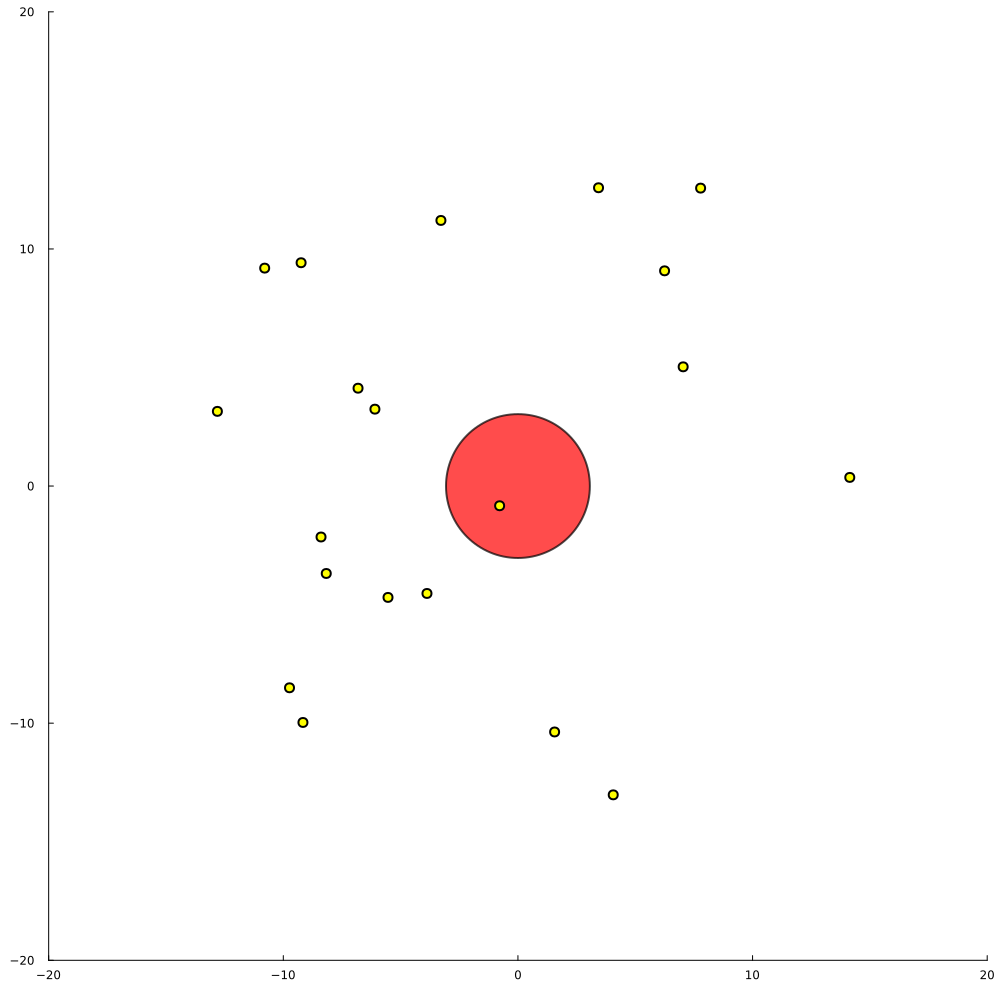

In [2]:
using Plots
using Random
#Random.seed!(2018)
x = [0]
y = [0]
ms = [80]
col=["red"]
scatter(x, y, markersize=ms,color=col,alpha=0.7,label="Cell")
for i in 1:20
    x,y=GenerateHit(R,Rk)
    x=[x]
    y=[y]
    ms = [5]
   
    scatter!(x, y, markersize=ms,color=:yellow,label="track")
end
xlims!(-20,20)
ylims!(-20,20)
plot!(legend = false,grid=false,size=(1000,1000))

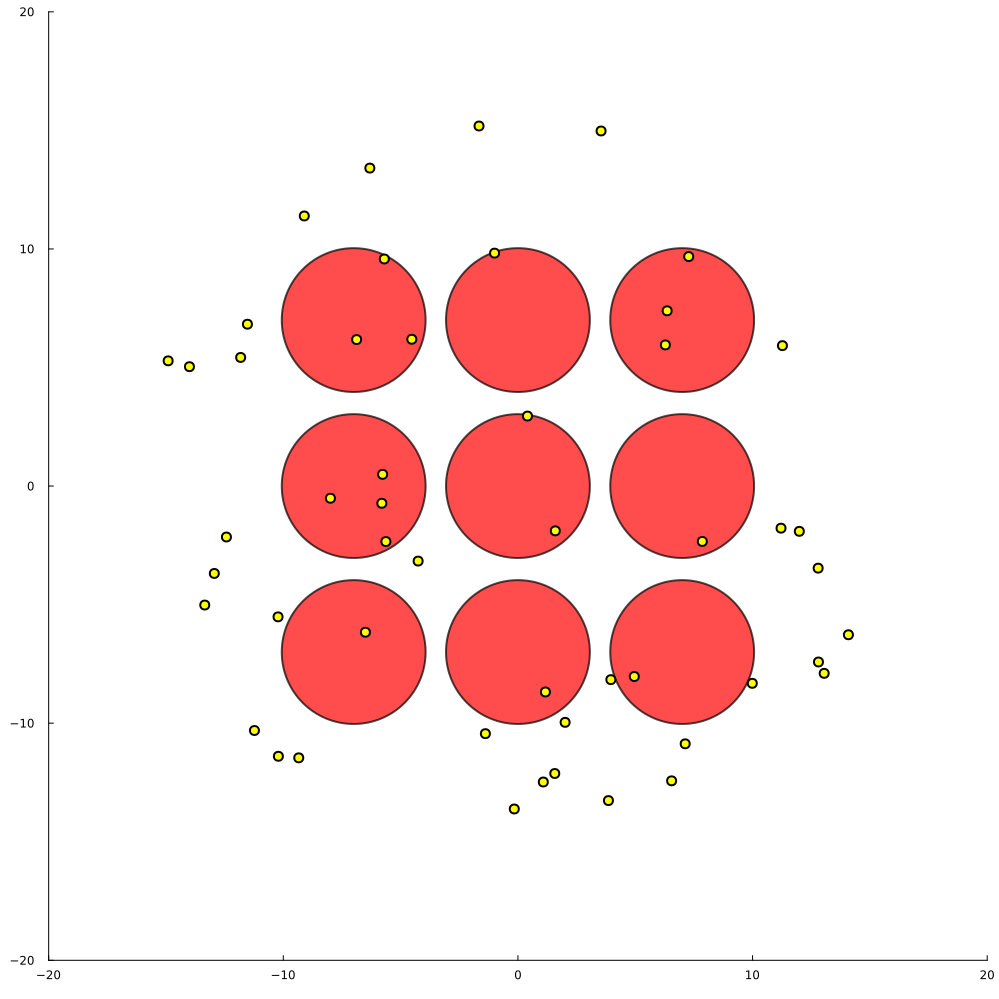

In [3]:
using Plots
using Random
#Random.seed!(2018)
x = [-7,-7,0,0,0,7,7,7,-7]
y = [-7,0,-7,0,7,0,7,-7,7]
ms = [80,80,80,80,80,80,80,80,80]
col=["red","red","red","red","red","red","red","red","red"]
scatter(x, y, markersize=ms,color=col,alpha=0.7,label="Cell")
for i in 1:50
    x,y=GenerateHit(R,Rk)
    x=[x]
    y=[y]
    ms = [5]
    col=["yellow"]
    scatter!(x, y, markersize=ms,color=col,label="track")
end
xlims!(-20,20)
ylims!(-20,20)
plot!(legend = false,grid=false,size=(1000,1000))

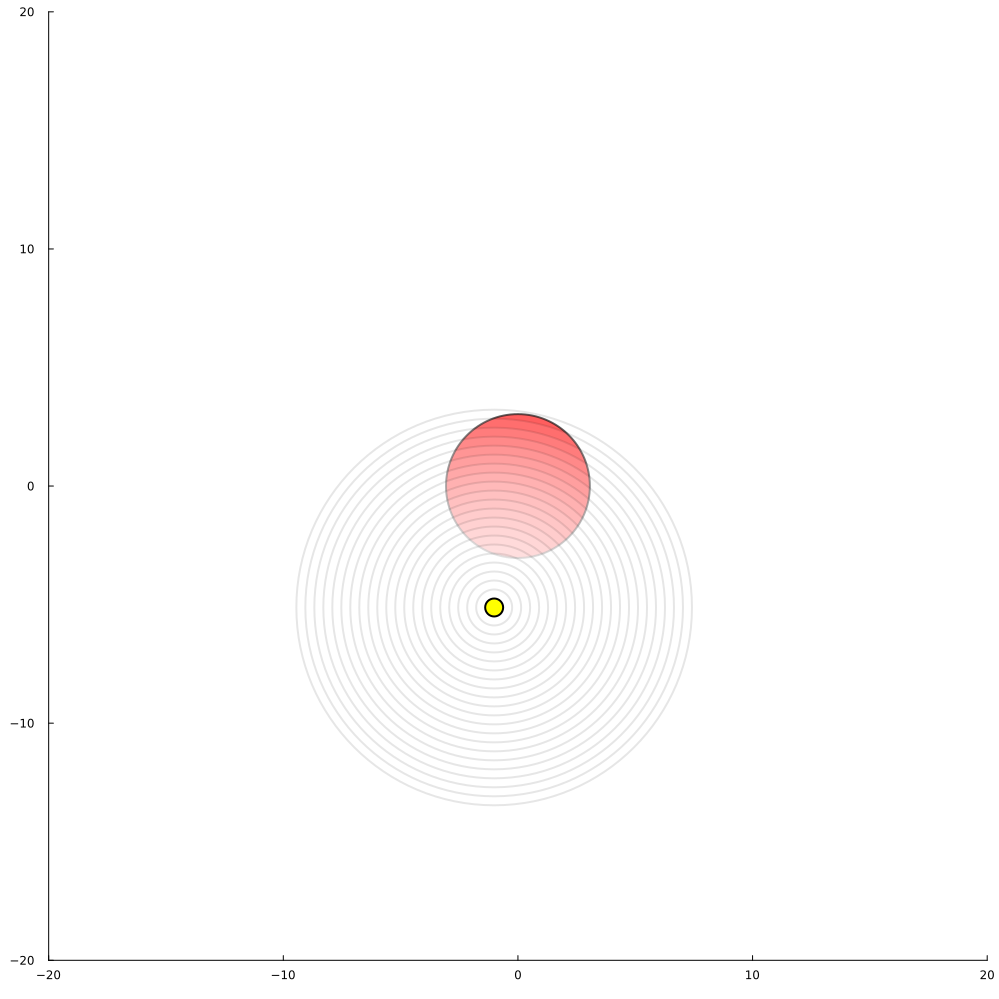

In [4]:
using Plots
using Random
Random.seed!(2024)
x = [0]
y = [0]
ms = [80]
col=["red"]
scatter(x, y, markersize=ms,color=col,alpha=0.7,label="Cell")
x,y=GenerateHit(R,Rk)
x=[x]
y=[y]
for i in 1:22

    ms = [(23-i)*10]
    if i==22
        scatter!(x, y, markersize=ms,color=:yellow,alpha=1,label="track")
    else
        scatter!(x, y, markersize=ms,color=:white,alpha=0.1,label="track")

    end
end
xlims!(-20,20)
ylims!(-20,20)
plot!(legend = false,grid=false,size=(1000,1000))